In [24]:
import numpy as np
import pandas as pd

test_df = pd.read_csv("20ng-train-all-terms.txt", 
            header=None, sep='\t', names=['label', 'text'])
train_df = pd.read_csv("20ng-test-all-terms.txt", 
            header=None, sep='\t', names=['label', 'text'])

In [28]:
 train_df.head()

,label,text
0,alt.atheism,re about the bible quiz answers in article hea...
1,alt.atheism,re amusing atheists and agnostics in article t...
2,alt.atheism,re yet more rushdie re islamic law jaeger buph...
3,alt.atheism,re christian morality is in article vice ico t...
4,alt.atheism,re after years can we say that christian moral...


In [29]:
train_counts = train_df['label'].value_counts()
train_counts

rec.sport.hockey            399
rec.motorcycles             398
soc.religion.christian      398
rec.sport.baseball          397
sci.crypt                   396
sci.med                     396
rec.autos                   395
comp.os.ms-windows.misc     394
sci.space                   394
sci.electronics             393
comp.sys.ibm.pc.hardware    392
comp.windows.x              392
misc.forsale                390
comp.graphics               389
comp.sys.mac.hardware       385
talk.politics.mideast       376
talk.politics.guns          364
alt.atheism                 319
talk.politics.misc          310
talk.religion.misc          251
Name: label, dtype: int64

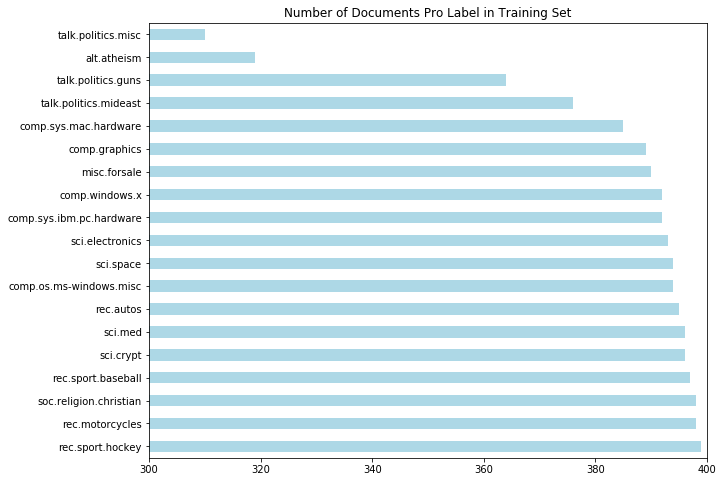

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
ax = train_counts.iloc[:-1].plot.barh(color = '#ADD8E6',
                                   title="Number of Documents Pro Label in Training Set")
ax.set_xlim([300,400])
plt.show()

In [ ]:
# train_df['label'].unique()

In [21]:
X_train = train_df.drop('label', 1).values
y_train = train_df['label'].values
X_test = test_df.drop('label', 1).values
y_test = test_df['label'].values

In [19]:
# Extract features from text files
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train.ravel()).toarray()
X_train_counts.shape

(7528, 59815)

In [20]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_counts, y_train)

In [23]:
X_test_counts = count_vect.fit_transform(X_test.ravel()).toarray()
print('NB accuracy for test set: %f' % clf.score(X_test_counts, y_test))

ValueError: shapes (11293,73686) and (59815,20) not aligned: 73686 (dim 1) != 59815 (dim 0)